In [ ]:

import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
import matplotlib.pyplot as plt

# Suppress warnings for clearer output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Assuming test data (X_test, y_test) and trained model saved as "best_lstm_model.keras"
# Load test features and labels
X_test = np.load("/content/drive/MyDrive/Dataset of ai/rolling_window_sequnces_1.npy")  # Replace with actual file path
metadata_test = pd.read_csv("/content/drive/MyDrive/Dataset of ai/sequence_metadata_with_RUL (1).csv")  # Replace with actual file path
y_test = metadata_test["RUL"].values

print("Test feature shape:", X_test.shape)
print("Test target shape:", y_test.shape)

# Load trained LSTM model
from tensorflow import keras
model = keras.models.load_model("/content/drive/MyDrive/Dataset of ai/best_gru_model.keras")



Test feature shape: (17631, 30, 66)
Test target shape: (17631,)


In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred.flatten()  # Flatten to 1-D array for metric calculations

print("Predictions shape:", y_pred.shape)


551/551 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
Predictions shape: (17631,)


In [ ]:

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Root Mean Squared Error (RMSE): 10.3241
Mean Absolute Error (MAE): 7.7186


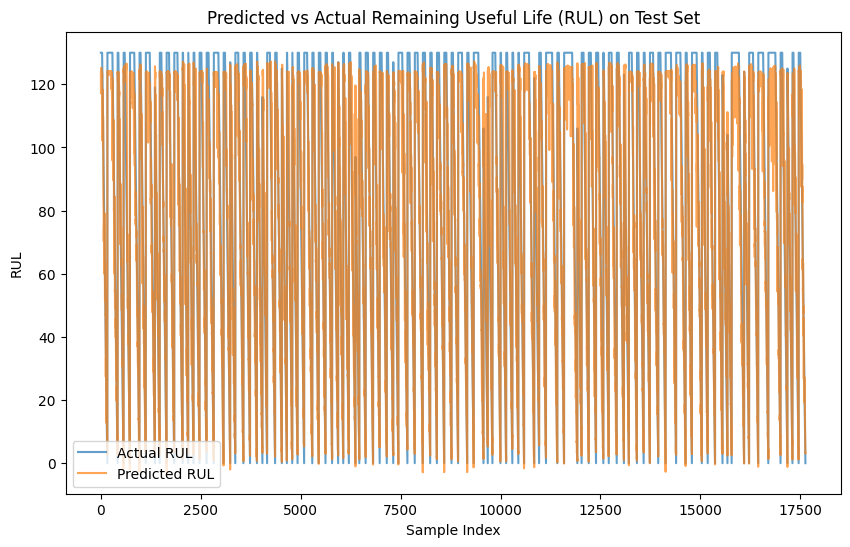

In [ ]:
# Visualize Actual Vs Predict RUL
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Actual RUL', alpha=0.7)
plt.plot(y_pred, label='Predicted RUL', alpha=0.7)
plt.title('Predicted vs Actual Remaining Useful Life (RUL) on Test Set')
plt.xlabel('Sample Index')
plt.ylabel('RUL')
plt.legend()
plt.show()